# Wine Quality Data Set

_Note: (This data set is available in UCI at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. An excerpt of the problem statement is reproduced here for convenience.)_

**Abstract:** Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

#### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


#### Attribute Information:

Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)

## Approach for Wine Quality Model Development

We will be developing separate models for the red wine and white wine datasets because the UCI website provides two separate datasets. We want to analyze them separately to determine if there is any difference in the models and predictions. If this hypothesis holds true, then we might want to deploy both models separately; otherwise we can combine predictions through a single model.

#### Project Setup:

Our project adopts a folder structure as follows:

<pre>
wine_quality_analysis
    |________ datasets
    |________ models
    |________ deployment
 </pre>

### How the code is organized

The code is provided in 3 sections:

**Section 1:** Red Wine Analysis, Model Creation and Saving

**Section 2:** White Wine Analysis, Model Creation and Saving

**Section 3:** Deployment Artifacts

In [1]:
#import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Section 1 - Red Wine Analysis, Model Creation and Saving

#### Read the red wine quality dataset

In [2]:
# read the dataset

red_wine_data = pd.read_csv('datasets/winequality-red.csv', delimiter =';')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Develop an ML Model

Developing an ML model involves a number of steps.

Let us adopt the following Machine Learning Pipeline:

1. **Sanity Check:** understand the data profile - number of rows, number of columns, data type of each column and its alignment with the expected data type as per the problem statement, target column characteristics and so on. 
2. **EDA/Preprocessing:** check if any features or attributes are missing and how to handle these;
3. Feature Engineering
4. Model Building
5. Model Saving
6. Model Deployment
7. Model in Production
8. Observe model behaviour
9. Obtain updated datasets
10. Redo steps 1..9 if required

## Sanity Check

1. Shape and data sufficiency: Check if there are sufficient rows of data for an ML problem
2. Datatypes: Check whether all the columns in the given dataset is numeric
3. Missing Values: Check whether there are missing values
4. Zero-variance: Check if there are any zero variance column in the dataset
5. Range of numbers in each column: Check if the column values within the dataset are in the same magnitude
6. Correlation: Check correlation between feature columns & target

In [3]:
# 1 Shape
red_wine_data.shape

(1599, 12)

In [4]:
# 3 Datatypes
red_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
#4 zero variance column needs to be removed. 

for col in red_wine_data:
    print(col, red_wine_data[col].value_counts().count())
    
#Since none of the column is invariant

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


In [8]:
# 4 Relationship between features & the target
red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


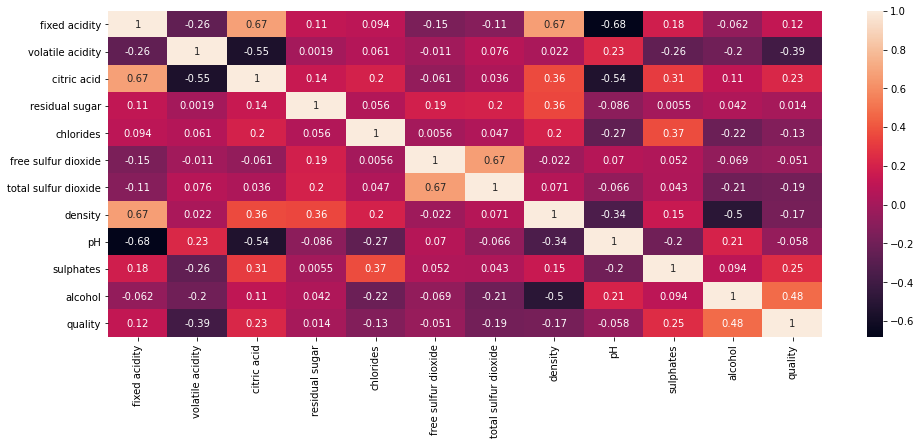

In [9]:
plt.figure(figsize=(16, 6))
sns.heatmap(red_wine_data.corr(), annot=True);

## Insights / Sanity Check Conclusions

1. **Shape and data sufficiency: Check if there are sufficient rows of data for an ML problem ---> (DONE)**
    1. **INSIGHT:** Shape of the data is (1599, 12). i.e., dataset contains ~1600 observations, which is much greater than number of columns (12). Hence we can apply ML techniques rather than statistical rule-based approach.


2. **Datatypes: Check whether all the columns in the given dataset is numeric ---> (DONE)**
    1. **INSIGHT:** `Dtype` indicates that all columns are numeric
    

3. **Missing Values: Check whether there are missing values ---->DONE**
    1. **INSIGHT:** `Non-Null Count` indicates there are no missing values in the dataset


4. **Zero-variance: Check if there are any zero variance column in the dataset ---> (DONE)**
    1. **INSIGHT:** No zero-variance columns found in the dataset


5. **Range of numbers in each column: Check if the column values within the dataset are in the same magnitude ---> (DONE)**
    1. **INSIGHT:** Each column has numbers within the same magnitude


6. **Correlation: Check correlation between feature columns & target -->DONE**
    1. **INSIGHT:** The columns `pH`, `free sulfur dioxide`, `residual sugar` have very weak correlation (0.00 - 0.20)
    2. **INSIGHT:** The columns `fixed acidity`, `citric acid`, `chlorides`, `total sulfur dioxide`, `density` have weak correlation (0.20 - 0.40)
    3. ***Note:*** *absolute values of correlations were considered*


7. **Other Observations:**
    1. **INSIGHT:** Since (a) the target is given (b) target is continuous (number between 0..10), we can conclude that this is a supervised linear regression problem
    2. **INSIGHT:** The target variable, i.e., `quality` has discrete values which indicates that this can be solved using classification methods also. However we will continue with Linear Regression in this exercise.


# EDA/Preprocessing
_(Based on the insights from the sanity check, we can now determine how to process the data.)_

## Checklist of STANDARD EDA items

1. Strategy for missing data
    1. Action: No missing data, no action to be taken
    
    
2. Convert categorical to numeric
    1. Action: No Categorical data, no action to be taken
    
    
3. Dimensionality reduction/Drop the identified columns
    1. Action: Drop identified columns in Insights 6A and 6B
    
    
4. Check for Outliers, Normalize data in columns to fit a range (*Optional*)
    1. Action: As per Insights 5A there are no Outliers

### Approach:
We will follow a 3-step approach as outlined below:

Step 1:
1. First, we will process the complete dataset without dropping any columns.
2. We will build the ML model with the complete data, test and validate the predictions.

Step 2:
1. As per Insights 6A, we will drop the columns that show very weak correlations. These columns are - `pH`, `free sulfur dioxide`, `residual sugar`
2. The dataset will thus have 9 features (including target)
3. We will build the ML model with the remaining data, test and validate the predictions

Step 3:
1. As per Insights 6B, we will next drop the columns that show weak correlations. These columns are - `fixed acidity`, `citric acid`, `chlorides`, `total sulfur dioxide`, `density`
2. The dataset will thus have 4 features (including target)
3. We will build the ML model with the remaining data, test and validate the predictions

Step 4:
1. Compare the Accuracy of all the three models developed
2. Choose the best model for deployment


#### Step 1:
Build the ML model with the complete data, test and validate the predictions.

In [10]:
lm_red_wine1 = LinearRegression()
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [11]:
red_model1 = lm_red_wine1.fit(X_train, y_train)

In [12]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_red_wine1.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
print('\nfirst 20 training preds:\n\n', train_prediction[:20])


first 20 training preds:

 [6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5]


In [13]:
def compare_prediction(y, yhat):
    comp_matrix = pd.DataFrame(zip(y_train,train_prediction), columns = ['Actual', 'Predicted'])
    comp_matrix['Err'] = abs(comp_matrix['Actual']-comp_matrix['Predicted'])
    comp_matrix['PctErr'] = comp_matrix['Err']/comp_matrix['Actual'] * 100
    mean_value = np.mean(comp_matrix['PctErr'])
    mean_value
    return comp_matrix, mean_value

In [14]:
comp_matrix, mean = compare_prediction(y, train_prediction)
print(comp_matrix, mean)

      Actual  Predicted  Err     PctErr
0          6          6    0   0.000000
1          6          6    0   0.000000
2          6          6    0   0.000000
3          5          5    0   0.000000
4          5          5    0   0.000000
...      ...        ...  ...        ...
1274       6          6    0   0.000000
1275       6          6    0   0.000000
1276       5          5    0   0.000000
1277       7          7    0   0.000000
1278       6          7    1  16.666667

[1279 rows x 4 columns] 8.055307345768645


In [15]:
accuracy1 = 100-mean
print('Accuracy1 = ', accuracy1)

Accuracy1 =  91.94469265423136


#### Step 2:
Drop pH, free sulfur dioxide, residual sugar columns.
Build the ML model, test and validate the predictions.

In [16]:
### 3. Dimensionality reduction/Drop the identified columns
# dropping very weak correlations
lst = ['pH', 'free sulfur dioxide', 'residual sugar']
red_wine_data.drop(lst, axis =1, inplace = True)

red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [17]:
lm_red_wine2 = LinearRegression()
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
red_model2 = lm_red_wine2.fit(X_train, y_train)

In [18]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_red_wine2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions] 

In [19]:
accuracy2 =100-mean
print("Accuracy2 =", accuracy2)

Accuracy2 = 91.94469265423136


#### Step 3:
Drop columns fixed acidity, citric acid, chlorides, total sulfur dioxide, density.Build the ML model, test and validate the predictions.

In [20]:
lst = ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density']
red_wine_data.drop(lst, axis =1, inplace = True)

In [21]:
lm_red_wine3 = LinearRegression()
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
red_model3 = lm_red_wine3.fit(X_train, y_train)

In [22]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_red_wine3.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

In [23]:
comp_matrix, mean = compare_prediction(y, train_prediction)
print(comp_matrix, mean)

      Actual  Predicted  Err     PctErr
0          6          6    0   0.000000
1          6          6    0   0.000000
2          6          6    0   0.000000
3          5          5    0   0.000000
4          5          5    0   0.000000
...      ...        ...  ...        ...
1274       6          6    0   0.000000
1275       6          6    0   0.000000
1276       5          5    0   0.000000
1277       7          7    0   0.000000
1278       6          7    1  16.666667

[1279 rows x 4 columns] 8.14066048624297


In [24]:
accuracy3 = 100-mean
print("Accuracy3 ",accuracy3 )

Accuracy3  91.85933951375704


#### Step 4:

Compare the Accuracy of all the three models developed


In [25]:
print("Model1 Accuracy {}".format(accuracy1))
print("Model2 Accuracy {}".format(accuracy2))
print("Model3 Accuracy {}".format(accuracy3))

Model1 Accuracy 91.94469265423136
Model2 Accuracy 91.94469265423136
Model3 Accuracy 91.85933951375704


#### Choose the best model for deployment.

Since we are getting the same accuracy across models, we are going for model3 as it has least number of features.

# Model Saving

In [26]:
model_file = open('models/red_wine_model.pkl', 'wb')
pickle.dump(obj=red_model3, file=model_file)
model_file.close()

In [27]:
# reload the model from disk and check if it is saved properly
model_file = open('models/red_wine_model.pkl', 'rb')
lr_model = pickle.load(model_file)
model_file.close()
print(lr_model)

LinearRegression()


## Section 2 - White Wine Analysis, Model Creation and Saving

In [28]:
#### Read the white wine quality dataset

white_wine_data = pd.read_csv('datasets/winequality-white.csv', delimiter = ';')

white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
# 1 Shape
white_wine_data.shape

(4898, 12)

In [30]:
# 3 Datatypes
white_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [31]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [32]:
white_wine_data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [33]:
#4 zero variance column needs to be removed. 

for col in white_wine_data:
    print(col, white_wine_data[col].value_counts().count())
    
#Since none of the column is invariant

fixed acidity 68
volatile acidity 125
citric acid 87
residual sugar 310
chlorides 160
free sulfur dioxide 132
total sulfur dioxide 251
density 890
pH 103
sulphates 79
alcohol 103
quality 7


In [34]:
# 4 Relationship between features & the target
white_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


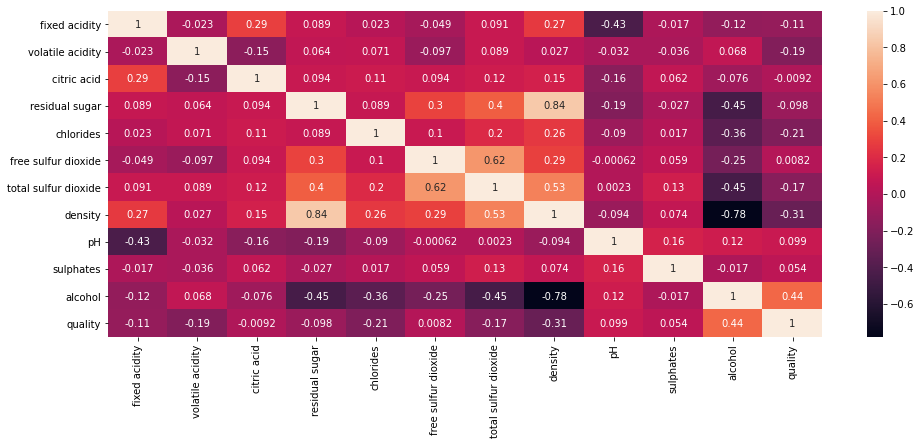

In [35]:
plt.figure(figsize=(16, 6))
sns.heatmap(white_wine_data.corr(), annot=True);

## Insights / Sanity Check Conclusions


1. **Shape and data sufficiency: Check if there are sufficient rows of data for an ML problem ---> (DONE)**
    1. **INSIGHT:** Shape of the data is (1599, 12). i.e., dataset contains ~1600 observations, which is much greater than number of columns (12). Hence we can apply ML techniques rather than statistical rule-based approach.


2. **Datatypes: Check whether all the columns in the given dataset is numeric ---> (DONE)**
    1. **INSIGHT:** `Dtype` indicates that all columns are numeric
    

3. **Missing Values: Check whether there are missing values ---->DONE**
    1. **INSIGHT:** `Non-Null Count` indicates there are no missing values in the dataset


4. **Zero-variance: Check if there are any zero variance column in the dataset ---> (DONE)**
    1. **INSIGHT:** No zero-variance columns found in the dataset


5. **Range of numbers in each column: Check if the column values within the dataset are in the same magnitude ---> (DONE)**
    1. **INSIGHT:** Each column has numbers within the same magnitude


6. **Correlation: Check correlation between feature columns & target -->DONE**
    1. **INSIGHT:** The columns `pH`, `free sulfur dioxide`, `residual sugar` have very weak correlation (0.00 - 0.20)
    2. **INSIGHT:** The columns `fixed acidity`, `citric acid`, `chlorides`, `total sulfur dioxide`, `density` have weak correlation (0.20 - 0.40)
    3. ***Note:*** *absolute values of correlations were considered*


7. **Other Observations:**
    1. **INSIGHT:** Since (a) the target is given (b) target is continuous (number between 0..10), we can conclude that this is a supervised linear regression problem
    2. **INSIGHT:** The target variable, i.e., `quality` has discrete values which indicates that this can be solved using classification methods also. However we will continue with Linear Regression in this exercise.


## Checklist of STANDARD EDA items

1. Strategy for missing data
    1. Action: No missing data, no action to be taken
    
    
2. Convert categorical to numeric
    1. Action: No Categorical data, no action to be taken
    
    
3. Dimensionality reduction/Drop the identified columns
    1. Action: Drop identified columns in Insights 6A and 6B
    
    
4. Check for Outliers, Normalize data in columns to fit a range (*Optional*)
    1. Action: As per Insights 5A there are no Outliers

### White Wine Analysis Approach After Insights:
We will follow a 3-step approach as outlined below:

Step 1:
1. First, we will process the complete dataset without dropping any columns.
2. We will build the ML model with the complete data, test and validate the predictions.

Step 2:
1. As per Insights 6A, we will drop the columns that show very weak correlations. These columns are - `pH`, `free sulfur dioxide`, `residual sugar`
2. The dataset will thus have 9 features (including target)
3. We will build the ML model with the remaining data, test and validate the predictions

Step 3:
1. As per Insights 6B, we will next drop the columns that show weak correlations. These columns are - `fixed acidity`, `citric acid`, `chlorides`, `total sulfur dioxide`, `density`
2. The dataset will thus have 4 features (including target)
3. We will build the ML model with the remaining data, test and validate the predictions

Step 4:
1. Compare the Accuracy of all the three models developed
2. Choose the best model for deployment


#### Step 1:
Build the ML model with the complete data, test and validate the predictions.

In [36]:
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3918, 11) (980, 11) (3918,) (980,)


In [38]:
lm_white_wine1 = LinearRegression()

white_model1 = lm_white_wine1.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_white_wine1.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]


In [39]:
comp_matrix, mean = compare_prediction(y, train_prediction)
print(comp_matrix, mean)

      Actual  Predicted  Err     PctErr
0          6          7    1  16.666667
1          5          6    1  20.000000
2          6          6    0   0.000000
3          7          6    1  14.285714
4          5          6    1  20.000000
...      ...        ...  ...        ...
3913       6          6    0   0.000000
3914       6          6    0   0.000000
3915       6          6    0   0.000000
3916       6          6    0   0.000000
3917       8          6    2  25.000000

[3918 rows x 4 columns] 9.456800926938781


In [40]:
accuracy1 = 100-mean
print('Accuracy1 = ', accuracy1)

Accuracy1 =  90.54319907306122


#### Step 2:
drop the columns that show very weak correlations (0.0 to 0.2 ). 

In [41]:
# Dimensionality reduction
lst = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'total sulfur dioxide', 'free sulfur dioxide','pH','sulphates']
white_wine_data.drop(lst, axis=1,inplace=True)
white_wine_data.head()

,chlorides,density,alcohol,quality
0,0.045,1.0010,8.8,6
1,0.049,0.9940,9.5,6
2,0.050,0.9951,10.1,6
3,0.058,0.9956,9.9,6
4,0.058,0.9956,9.9,6


In [42]:
lm_white_wine2 = LinearRegression()

In [43]:
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
white_model2 = lm_white_wine2.fit(X_train, y_train)

In [45]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_white_wine2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]


In [46]:
comp_matrix, mean = compare_prediction(y, train_prediction)
print(comp_matrix, mean)

      Actual  Predicted  Err     PctErr
0          6          7    1  16.666667
1          5          6    1  20.000000
2          6          6    0   0.000000
3          7          6    1  14.285714
4          5          6    1  20.000000
...      ...        ...  ...        ...
3913       6          6    0   0.000000
3914       6          6    0   0.000000
3915       6          6    0   0.000000
3916       6          6    0   0.000000
3917       8          6    2  25.000000

[3918 rows x 4 columns] 10.462669243297134


In [47]:
accuracy2 = 100 - mean
print('Accuracy2 = ', accuracy2)

Accuracy2 =  89.53733075670287


#### Step 3: Drop columns weak columns(0-2 to 0.4)
Buiding model with just one column





In [48]:
lst = ['chlorides', 'density']
white_wine_data.drop(lst, axis=1,inplace=True)
white_wine_data.head()

,alcohol,quality
0,8.8,6
1,9.5,6
2,10.1,6
3,9.9,6
4,9.9,6


In [49]:
lm_white_wine3 = LinearRegression()

In [50]:
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3918, 1) (980, 1) (3918,) (980,)


In [52]:
white_model3 = lm_white_wine3.fit(X_train, y_train)

In [53]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_white_wine3.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

In [54]:
comp_matrix, mean = compare_prediction(y, train_prediction)
print(comp_matrix, mean)

      Actual  Predicted  Err     PctErr
0          6          6    0   0.000000
1          5          6    1  20.000000
2          6          6    0   0.000000
3          7          6    1  14.285714
4          5          6    1  20.000000
...      ...        ...  ...        ...
3913       6          6    0   0.000000
3914       6          6    0   0.000000
3915       6          6    0   0.000000
3916       6          6    0   0.000000
3917       8          6    2  25.000000

[3918 rows x 4 columns] 10.624994935867852


In [55]:
accuracy3 = 100-mean
print('Accuracy3 = ', accuracy3)

Accuracy3 =  89.37500506413215


#### Step 4:

Compare the Accuracy of all the three models developed


In [56]:
print("Model1 Accuracy {}".format(accuracy1))
print("Model2 Accuracy {}".format(accuracy2))
print("Model3 Accuracy {}".format(accuracy3))

Model1 Accuracy 90.54319907306122
Model2 Accuracy 89.53733075670287
Model3 Accuracy 89.37500506413215


#### Choose the best model for deployment.
Since we are getting the maximum accuracy from the first model, we are going for model1 .

# Model Saving

In [57]:
#Saving the model
model_file = open('models/white_wine_model.pkl','wb')
pickle.dump(white_model1, model_file)
model_file.close()


In [58]:
# reload the model from disk and check if it is saved properly
model_file = open('models/white_wine_model.pkl', 'rb')
lr_model = pickle.load(model_file)
model_file.close()
print(lr_model)

LinearRegression()
